In [11]:
using MLBase

┌ Info: Precompiling MLBase [f0e99cf1-93fa-52ec-9ecc-5026115318e0]
└ @ Base loading.jl:1260


In [45]:
using Makie

┌ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
└ @ Base loading.jl:1260
ERROR: LoadError: The file C:\Users\Rahul\.julia\packages\GLMakie\wpJsD\src\..\deps\deps.jl does not exist.
This file is generated during the build process; it is possible that GLMakie
wasn't built correctly.  To rerun the build process, run `Pkg.build("GLMakie"),
or enter the Pkg REPL mode (`]`) and then type `build GLMakie`.

Stacktrace:
 [1] error(::String) at .\error.jl:33
 [2] top-level scope at C:\Users\Rahul\.julia\packages\GLMakie\wpJsD\src\GLMakie.jl:48
 [3] include(::Module, ::String) at .\Base.jl:377
 [4] top-level scope at none:2
 [5] eval at .\boot.jl:331 [inlined]
 [6] eval(::Expr) at .\client.jl:449
 [7] top-level scope at .\none:3
in expression starting at C:\Users\Rahul\.julia\packages\GLMakie\wpJsD\src\GLMakie.jl:45
ERROR: LoadError: Failed to precompile GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a] to C:\Users\Rahul\.julia\compiled\v1.4\GLMakie\nfnZR_s2AhS.ji.
Stacktrace:
 [1]

ErrorException: Failed to precompile Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a] to C:\Users\Rahul\.julia\compiled\v1.4\Makie\iZ1Bl_s2AhS.ji.

In [38]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [35]:
using LinearAlgebra

In [24]:
using MultivariateStats

┌ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
└ @ Base loading.jl:1260


In [17]:
using Statistics

In [1]:
using VegaDatasets

In [2]:
using DataFrames

In [3]:
C= DataFrame(VegaDatasets.dataset("cars"))

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [15]:
dropmissing!(C)
M=Matrix(C[:,2:7])
names(C)

9-element Array{String,1}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [8]:
car_or=C[:,:Origin]

392-element Array{String,1}:
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 ⋮
 "USA"
 "USA"
 "USA"
 "USA"
 "Japan"
 "USA"
 "USA"
 "USA"
 "Europe"
 "USA"
 "USA"
 "USA"

In [12]:
carmap=labelmap(car_or)   # creates encodings

LabelMap (with 3 labels):
[1] USA
[2] Japan
[3] Europe


In [13]:
uniqueids=labelencode(carmap,car_or) #applies labelencodings 

392-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

<h3>PCA

In [18]:
data = M
data = (data .-mean(data,dims=1))./std(data,dims=1)

392×6 Array{Float64,2}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   

In [19]:
data

392×6 Array{Float64,2}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   

PCA expects columns to be obeservation so we need to transpose the matix

PCA takes features by sample matrix

In [20]:
data'

6×392 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

In [26]:
p=fit(PCA,data',maxoutdim=2)  # maxdimout  to specify how many features to reduce to

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333573)

In [27]:
P=projection(p)

6×2 Array{Float64,2}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

<h2> to transform data

In [30]:
P'*(data[1,:]-mean(p))

2-element Array{Float64,1}:
 -2.323001696522692
 -0.5713519642644691

OR

In [31]:
Yte=MultivariateStats.transform(p,data')   

2×392 Array{Float64,2}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

we can also go from 2 dimensions 6 dim  via reconstruct function

but it would not be exactly as it was previous but would be pretty close

In [33]:
recons=reconstruct(p,Yte)

6×392 Array{Float64,2}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [37]:
norm(recons-data')  # this wont be zero because noise will be createed during reconstruct 

13.743841055569009

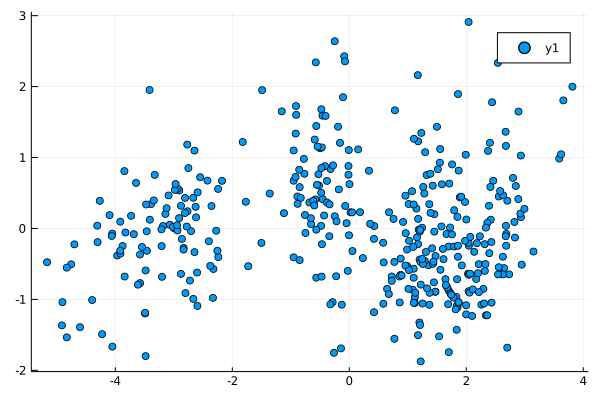

In [41]:
Plots.scatter(Yte[1,:],Yte[2,:])

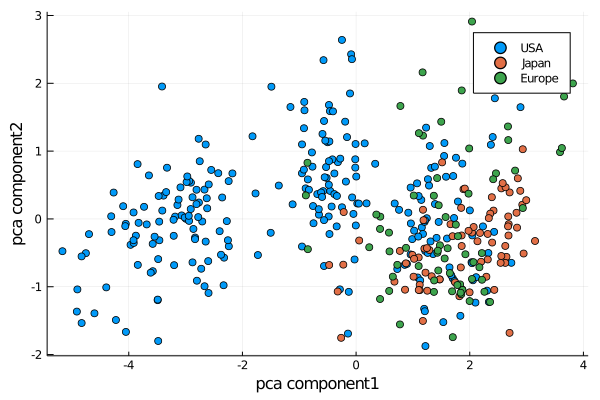

In [43]:

Plots.scatter(Yte[1,car_or.=="USA"],Yte[2,car_or.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_or.=="Japan"],Yte[2,car_or.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_or.=="Europe"],Yte[2,car_or.=="Europe"],color=3,label="Europe")


In [54]:
scene=Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids)   # plots 3D image

BoundsError: BoundsError: attempt to access 2×392 Array{Float64,2} at index [3, Base.Slice(Base.OneTo(392))]

In [53]:
display(scene)  # to create a interactive Gui

UndefVarError: UndefVarError: scene not defined

2×392 Array{Float64,2}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607